# Cell creation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tifffile as tiff
import skimage as sk
from copy import copy

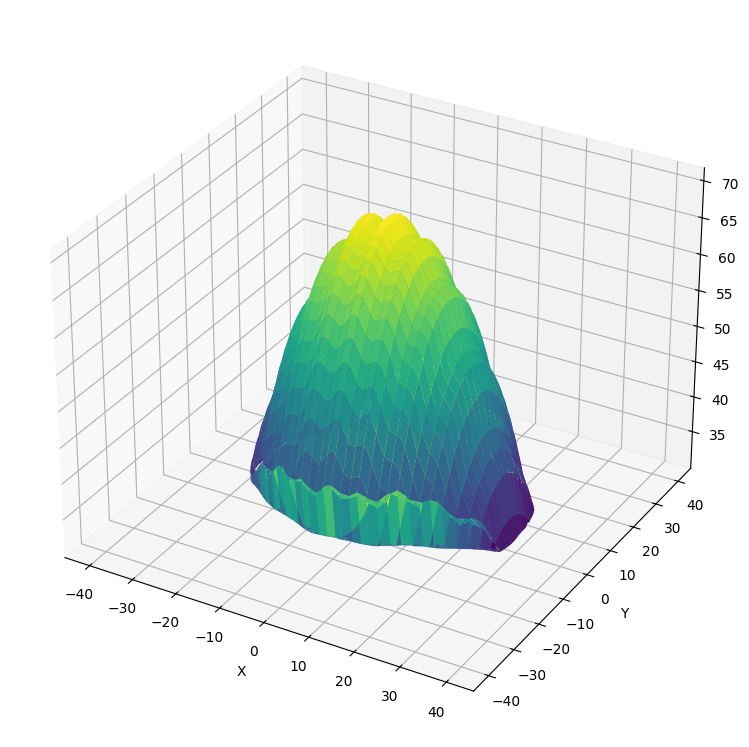

In [1]:


# Create a grid of x and y values
resolution = 500
size = 40
x = np.linspace(-size,  size,  resolution+1)
y = np.linspace(-size,  size,  resolution+1)
x, y = np.meshgrid(x, y)


z1 = (-0.05*x**2-0.05*y**2+70)+np.sin(x) # top
z12 = (-0.043*x**2-0.05*y**2+70)+np.sin(x) # top
z2 = (-0.01*x**2-0.012*y**2+40) # bottom
# z3 = 0.01*x**2+1*y-10 # side 1
z3 = -5*y+0.1*x**2+np.sin(x/2)-80
z32 = 5*y-70

# 



# # # Create a mask for z1 where z2 is not nan
mask_z1 = x > 0
z1 = np.where(mask_z1, z12, z1)

# Create a mask for z4 where z3 is between z2 and z1
mask_z4 = (z3 > z2) & (z3 < z1)
z4 = np.where(mask_z4, z3, np.nan)

mask_z5 = (z32 > z2) & (z32 < z1)
z5 = np.where(mask_z5, z32, np.nan)






# Create a mask for z2 where z2 is less than z1
mask_z2 = z2 < z1
z2 = np.where(mask_z2, z2, np.nan)


mask_z1 = ~np.isnan(z2)
z1 = np.where(mask_z1, z1, np.nan)



for i, z in enumerate([z3, z32]):

    mask_z2 = z2 > z
    z2 = np.where(mask_z2, z2, np.nan)

    mask_z1 = z1 > z
    z1 = np.where(mask_z1, z1, np.nan)




# Create a list of z arrays
z_arrays = [z1, z2, z4, z5]  # Add more z arrays to the list as needed


# Create a figure with subplots
fig = plt.figure(figsize=(15,  15))

# Create a  3D subplot for each z array
ax = fig.add_subplot(2,  2, 1, projection='3d')

for i, z in enumerate(z_arrays):
    ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Create a  2D subplot for each z array
# for i, z in enumerate(z_arrays):
#     ax = fig.add_subplot(2,  2, i+3)
#     ax.contourf(x, y, z, cmap='viridis')
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_title(f'Top View {i+1}')

plt.tight_layout()
plt.show()

In [2]:
d3_array = np.zeros(shape=(resolution, resolution, resolution))

def update_d3_array(z, d3_array):
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            if not np.isnan(z[i][j]):
                d3_array[i][j][int(z[i][j]*5)] =  1

# Update d3_array with each z array
update_d3_array(z1, d3_array)
update_d3_array(z2, d3_array)
update_d3_array(z4, d3_array)
update_d3_array(z5, d3_array)


def normalize_image(im, mult_factor = 1):
    '''
    Normalize image 0-1 and multiply by any factor
    '''
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im



cell_write = './../ppujol/benchmarking/cell2.tif'



In [3]:
d3_array = sk.morphology.binary_dilation(d3_array, footprint=sk.morphology.ball(2))


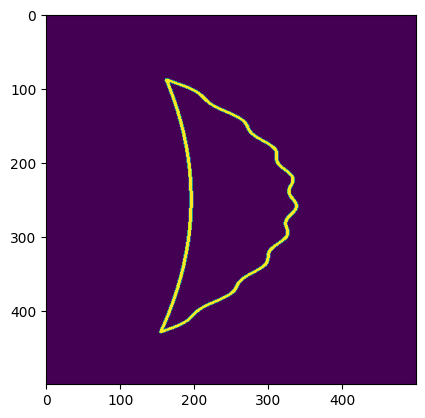

In [4]:
d3_array=d3_array.astype(np.uint8)
plt.imshow(d3_array[300])

In [5]:
tiff.imwrite(cell_write, normalize_image(d3_array, 65535).astype(np.uint16), imagej=True)

# Dome creation

/tmp/ipykernel_10790/3856944020.py:9: RuntimeWarning: divide by zero encountered in divide
  z1 = -(0.8/np.sin(0.5*x))**2-(0.8/np.sin(0.5*y))**2+4


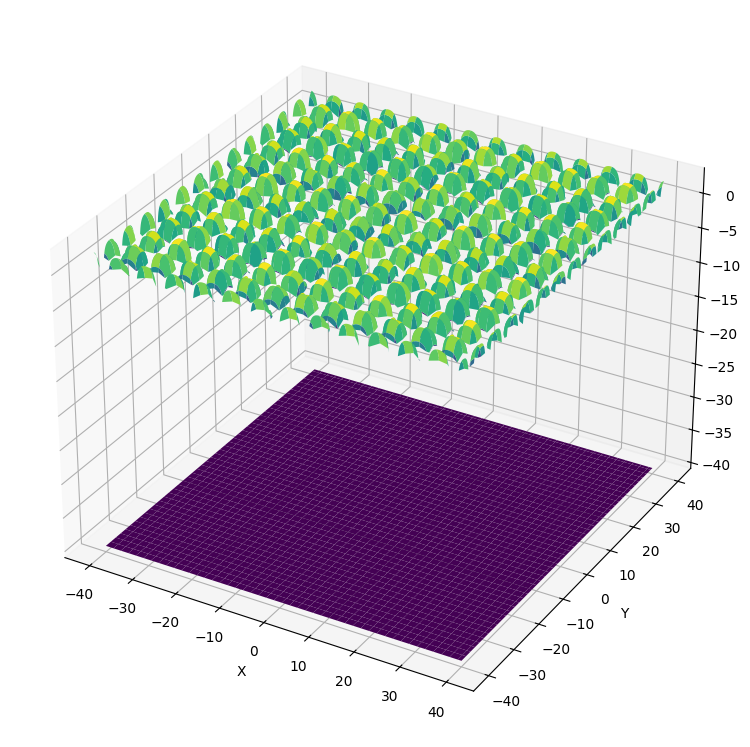

In [142]:
# Create a grid of x and y values
resolution = 500
size = 40
x = np.linspace(-size,  size,  resolution+1)
y = np.linspace(-size,  size,  resolution+1)
x, y = np.meshgrid(x, y)


z1 = -(0.8/np.sin(0.5*x))**2-(0.8/np.sin(0.5*y))**2+4


z2 = -40+0*x

# # # Create a mask for z1 where z2 is not nan
mask_z1 = z1 > 0
z1 = np.where(mask_z1, z1, np.nan)

# Create a list of z arrays
z_arrays = [z1,z2]  # Add more z arrays to the list as needed


# Create a figure with subplots
fig = plt.figure(figsize=(15,  15))

# Create a  3D subplot for each z array
ax = fig.add_subplot(2,  2, 1, projection='3d')

for i, z in enumerate(z_arrays):
    ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Create a  2D subplot for each z array
# for i, z in enumerate(z_arrays):
#     ax = fig.add_subplot(2,  2, i+3)
#     ax.contourf(x, y, z, cmap='viridis')
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_title(f'Top View {i+1}')

plt.tight_layout()
plt.show()

In [28]:
# d3_array = np.zeros(shape=(resolution, resolution, resolution))

def update_d3_array(z, d3_array):
    for i in range(z.shape[0]-1):
        for j in range(z.shape[1]-1):
            if not np.isnan(z[i][j]):
                d3_array[i][j][int(z[i][j]*5)] =  1
                
# Update d3_array with each z array
update_d3_array(z1, d3_array)



def normalize_image(im, mult_factor = 1):
    '''
    Normalize image 0-1 and multiply by any factor
    '''
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im



# cell_write = './../ppujol/benchmarking/dome1.tif'
# d3_array = sk.morphology.binary_dilation(d3_array, footprint=sk.morphology.ball(2))
# d3_array=d3_array.astype(np.uint8)




In [217]:
# Calculate the sum along axis  2
column_sums = np.sum(d3_array, axis=2)

# Find the indices of the columns that sum to zero
zero_sum_indices = np.where(column_sums[:,0] ==  0)

d3_array_2 = np.delete(d3_array, zero_sum_indices, axis=1)

zero_sum_indices = np.where(column_sums[0,:] ==  0)

d3_array_2 = np.delete(d3_array_2, zero_sum_indices, axis=0)


d3_array_2 = sk.morphology.binary_dilation(d3_array_2, footprint=sk.morphology.ball(2))
d3_array_2=d3_array_2.astype(np.uint8)

40 20
20


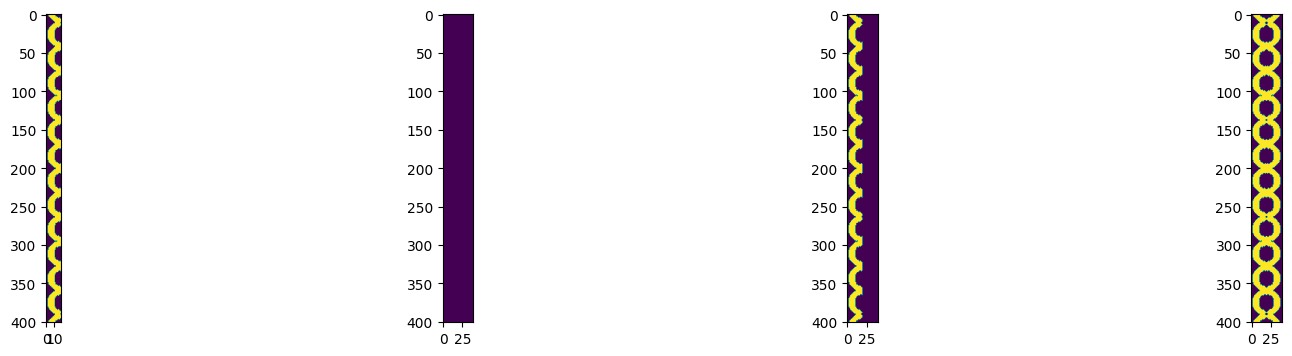

In [334]:
column_sums = np.sum(d3_array_2, axis=0)
zero_sum_indices = np.where(column_sums[0,:] ==  0)
d3_array_3 = np.delete(d3_array_2, np.array(zero_sum_indices)[0][3:], axis=2) # Save a bit of margin




d3_array_4 = np.zeros(shape=(d3_array_3.shape[0], d3_array_3.shape[1], d3_array_3.shape[2]*2))



plt.figure(figsize=(20,4))
plt.subplot(141)
d3_array_3 = np.rot90(d3_array_3, k=2, axes=(0,  2))
plt.imshow(d3_array_3[25])
plt.subplot(142)
plt.imshow(d3_array_4[25])

print(d3_array_4.shape[2] , d3_array_3.shape[2])
# Calculate the number of  0 planes needed to add to the first array
num_zeros_needed = d3_array_4.shape[2] - d3_array_3.shape[2]
print(num_zeros_needed)

# # Create a new  3D array filled with zeros and with the same shape as the first array
zeros_3d = np.zeros(shape=(d3_array_3.shape[0], d3_array_3.shape[1], 1))

for _ in range(num_zeros_needed):
    d3_array_3 = np.concatenate((d3_array_3, zeros_3d), axis=2)

# # Now you can sum the two arrays
sum_array = d3_array_3 + d3_array_4

plt.subplot(143)
plt.imshow(sum_array[25])


sum_array_2 = np.rot90(sum_array, k=2, axes=(0,  2))

sum_array_2 = sum_array + sum_array_2

plt.subplot(144)
plt.imshow(sum_array_2[25])



In [335]:
tiff.imwrite(cell_write, normalize_image(sum_array_2, 65535).astype(np.uint16), imagej=True)

# Monolayer 2

/tmp/ipykernel_1418262/2236969555.py:9: RuntimeWarning: divide by zero encountered in divide
  z1 = -(0.8/np.sin(0.5*x))**2-(0.8/np.sin(0.5*y))**2+5
/tmp/ipykernel_1418262/2236969555.py:10: RuntimeWarning: divide by zero encountered in divide
  z12 = (0.4/np.sin(0.5*x))**2+(0.4/np.sin(0.5*y))**2


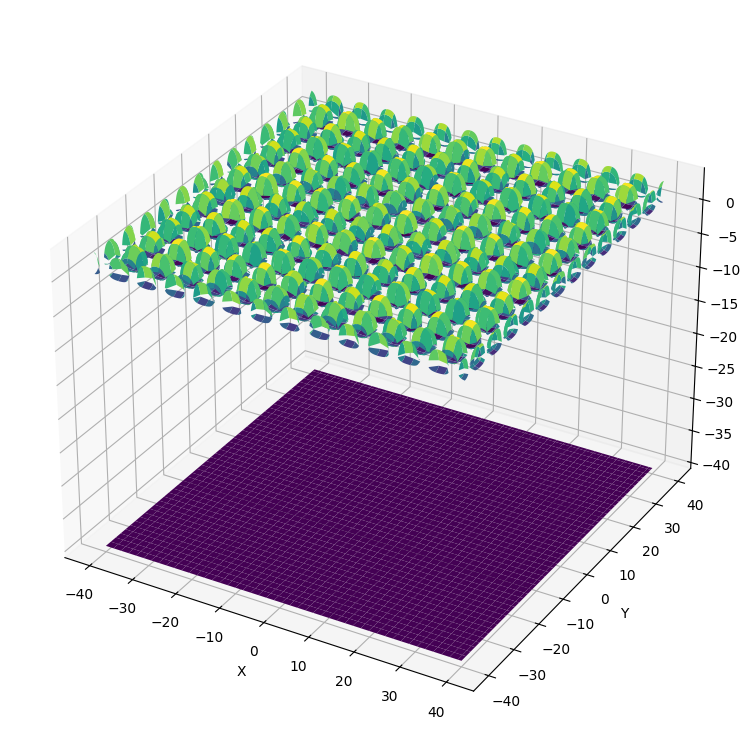

In [21]:
# Create a grid of x and y values
resolution = 500
size = 40
x = np.linspace(-size,  size,  resolution+1)
y = np.linspace(-size,  size,  resolution+1)
x, y = np.meshgrid(x, y)


z1 = -(0.8/np.sin(0.5*x))**2-(0.8/np.sin(0.5*y))**2+5
z12 = (0.4/np.sin(0.5*x))**2+(0.4/np.sin(0.5*y))**2

z2 = -40+0*x

# # # Create a mask for z1 where z2 is not nan
mask_z1 = z1 > z12
z1 = np.where(mask_z1, z1, np.nan)


mask_z12 = z12 < z1
z12 = np.where(mask_z12, z12, np.nan)

# Create a list of z arrays
z_arrays = [z1,z2, z12]  # Add more z arrays to the list as needed


# Create a figure with subplots
fig = plt.figure(figsize=(15,  15))

# Create a  3D subplot for each z array
ax = fig.add_subplot(2,  2, 1, projection='3d')

for i, z in enumerate(z_arrays):
    ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Create a  2D subplot for each z array
# for i, z in enumerate(z_arrays):
#     ax = fig.add_subplot(2,  2, i+3)
#     ax.contourf(x, y, z, cmap='viridis')
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_title(f'Top View {i+1}')

plt.tight_layout()
plt.show()

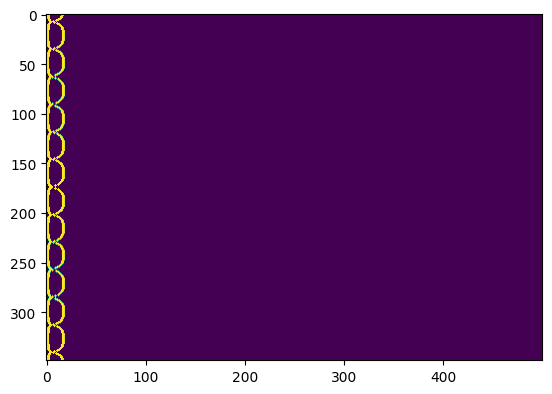

In [60]:
d3_array = np.zeros(shape=(resolution, resolution, resolution))

def update_d3_array(z, d3_array):
    for i in range(z.shape[0]-1):
        for j in range(z.shape[1]-1):
            if not np.isnan(z[i][j]):
                d3_array[i][j][int(z[i][j]*5)] =  1
                
# Update d3_array with each z array
update_d3_array(z1, d3_array)
update_d3_array(z12, d3_array)



def normalize_image(im, mult_factor = 1):
    '''
    Normalize image 0-1 and multiply by any factor
    '''
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im



cell_write = './../ppujol/benchmarking/dome1.tif'
# d3_array = sk.morphology.binary_dilation(d3_array, footprint=sk.morphology.ball(2))
d3_array=d3_array.astype(np.uint8)

# Calculate the sum along axis  2
column_sums = np.sum(d3_array, axis=2)

# Find the indices of the columns that sum to zero
zero_sum_indices = np.where(column_sums[:,0] ==  0)

d3_array_2 = np.delete(d3_array, zero_sum_indices, axis=1)

zero_sum_indices = np.where(column_sums[0,:] ==  0)

d3_array_2 = np.delete(d3_array_2, zero_sum_indices, axis=0)


d3_array_2 = sk.morphology.binary_dilation(d3_array_2, footprint=sk.morphology.ball(1))
d3_array_2=d3_array_2.astype(np.uint8)


plt.imshow(d3_array_2[100])

In [61]:
d3_array_2 = np.transpose(d3_array_2, axes=(2, 1, 0))

In [24]:
# d3_array_cut_blank = d3_array_2[:, 7:-7, 8:-7]
# d3_array_cut_blank.shape

(500, 335, 334)

In [30]:
d3_array_cut_blank_write_2 = './../ppujol/benchmarking/dome2_all_bright_cells.tif'
tiff.imwrite(d3_array_cut_blank_write_2, normalize_image(d3_array_cut_blank, 65535).astype(np.uint16), imagej=True)

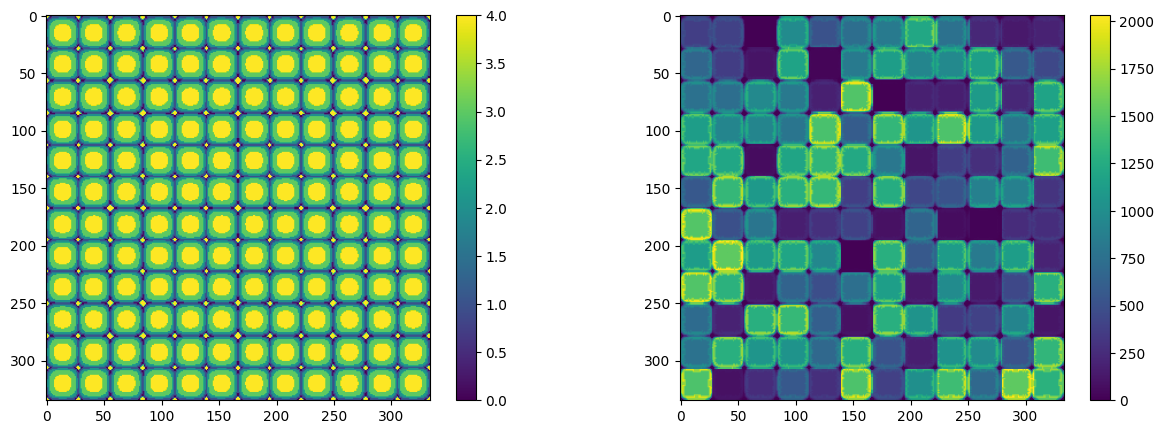

In [62]:
def reverse_values(im):
    rev_im = im.max()-im
    return rev_im

d3_array_cut = d3_array_2[:, 7:-7, 8:-7]

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(reverse_values(np.argmax(d3_array_cut, axis=0)))
plt.colorbar()

deltas_i = np.array(np.where(np.argmax(d3_array_cut, axis=0)[150, :] > 2.5))[0]
deltas_j = np.array(np.where(np.argmax(d3_array_cut, axis=0)[:, 150] > 2.5))[0]-1

d3_array_dark_cells = copy(d3_array_cut)



# pass_i = False
# back_i = 0
# c_i = 1
# for i in deltas_i[1:-1]:
#     print(i,pass_i, deltas_i[c_i])
#     c_i+=1
#     if pass_i == True:
#         pass_i = False
#         continue
#     if (i+1 in deltas_i):
#         pass_i = True
    
#     d3_array_dark_cells[:, i+1:deltas_i[c_i]+1, :] = d3_array_dark_cells[:, i+1:deltas_i[c_i]+1, :] * np.random.normal() * 100
    
    
    



delta = int(28)
d3_array_dark_cells = copy(d3_array_cut)
for i in range(0, d3_array_cut.shape[1], delta):
    # print(i)
    for j in range(0, d3_array_cut.shape[2], delta):
        d3_array_dark_cells[:, i:i+delta, j:j+delta] = d3_array_dark_cells[:, i:i+delta, j:j+delta] * np.random.normal() * 100



plt.subplot(1,2,2)
plt.imshow(np.sum(d3_array_dark_cells, axis=0))
plt.colorbar()
        

In [78]:
d3_array_dark_cells.shape

(500, 335, 334)

In [228]:
cell_write_2 = './../ppujol/benchmarking/dome_flat_basal.tif'
tiff.imwrite(cell_write_2, normalize_image(d3_array_dark_cells, 65535).astype(np.uint16), imagej=True)

array([  0,  28,  55,  56,  83,  84, 111, 112, 139, 166, 167, 194, 221,
       222, 249, 250, 277, 278, 305, 333])

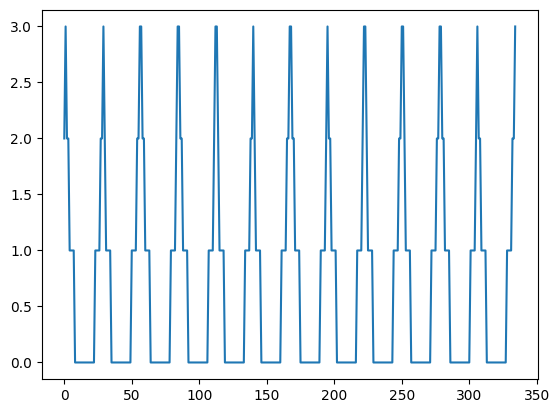

In [175]:




plt.plot(np.argmax(d3_array_cut, axis=0)[:, 150])






np.array(np.where(np.argmax(d3_array_cut, axis=0)[:, 150] > 2.5))[0]-1











